In [19]:
from zlib import crc32
import numpy as np

types = ['regression', 'classification']
datasets = {'regression': [{'name': 'Servo Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Servo'}, 
                           {'name': 'Forest Fires Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Forest+Fires'},
                           {'name': 'Boston Housing Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston'}, 
                           {'name': 'Diabetes Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'}],
            'classification': [{'name': 'Spambase Data Set',
                                'url': 'https://archive.ics.uci.edu/ml/datasets/Spambase'}, 
                               {'name': 'Wine Data Set',
                                'url': 'https://scikit-learn.org/s​grabovoy.av@phystech.edu​table/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine'}, 
                               {'name': 'Breast Cancer Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'}, 
                               {'name': 'MNIST',
                                'url': 'http://yann.lecun.com/exdb/mnist/'}]}
methods = {'regression': ['Линейная регрессия', 
                          'Перцептрон', 
                          'Надарая-Ватсона',
                          'SVR'],
           'classification': ['Логистическая регрессия', 
                              'Перцептрон', 
                              'k-ближайших соседей',
                              'Метод потенциальных функций',
                              'Метод Парзеновского окна', 
                              'SVM']}
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
task['id'] = crc32(task['mail'].encode('utf-8'))
np.random.seed(task['id'])
task['type'] = np.random.choice(types)
task['dataset'] = np.random.choice(datasets[task['type']])
task['method'] = np.random.choice(
    methods[task['type']], size=3, replace=False).tolist()


task


Enter your mail:  filak.a@phystech.edu


{'mail': 'filak.a@phystech.edu',
 'id': 1084834779,
 'type': 'classification',
 'dataset': {'name': 'MNIST', 'url': 'http://yann.lecun.com/exdb/mnist/'},
 'method': ['Метод потенциальных функций', 'k-ближайших соседей', 'SVM']}

# Homework 1

### Import all required packages

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns


### Load MNIST dataset 

In [3]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.int8)  # Convert labels to integers



### Split dataset into train and test sets

X            - given dataset.

y            - lables array.

test size    - proportion of test and train datasets.

random_state - reproduce the same results across multiple runs by seeding the random number generator.

In [4]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.166, random_state=42)



### Visualisation of given dataset

Here are first five pictures from the dataset and labels for them.

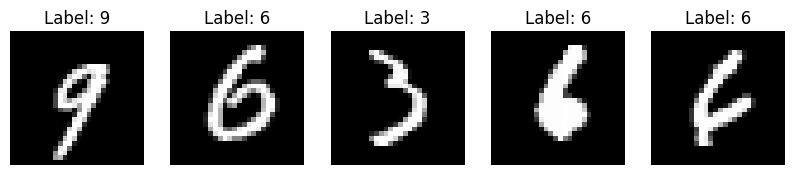

In [5]:
# Step 2: Data Analysis (Display some samples)
# Convert DataFrame to NumPy array
X_train_np = X_train.to_numpy()

# Display the first 5 samples
fig, axes = plt.subplots(1, 5, figsize=(10, 4))
for i, ax in enumerate(axes):
    ax.imshow(X_train_np[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y_train.iloc[i]}')  # Access label with .iloc for proper indexing
    ax.axis('off')
plt.show()


### Normalization

Here is normalization of given dataset. 

We use standartization technique(Z-Score Normalization). 

In [6]:
# Step 3: Preprocessing (Normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## k-Nearest Neighbors

### k-Nearest Neighbors training

knn.fit implementaion of k-NN method is used.

In [7]:
# Step 4: k-Nearest Neighbors (k-NN) Implementation
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test_scaled)



/home/alex/study/VII_semestr/machine_learning/task-1/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Results of k-Nearest Neighbors model

In [8]:
# Evaluation for k-NN
print("k-NN Classification Report")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy of k-NN: {accuracy_score(y_test, y_pred_knn):.4f}")



k-NN Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1135
           1       0.11      1.00      0.21      1330
           2       0.00      0.00      0.00      1135
           3       0.00      0.00      0.00      1189
           4       0.00      0.00      0.00      1089
           5       0.00      0.00      0.00      1056
           6       0.00      0.00      0.00      1132
           7       0.00      0.00      0.00      1229
           8       0.00      0.00      0.00      1132
           9       0.00      0.00      0.00      1193

    accuracy                           0.11     11620
   macro avg       0.01      0.10      0.02     11620
weighted avg       0.01      0.11      0.02     11620

Accuracy of k-NN: 0.1145


/home/alex/study/VII_semestr/machine_learning/task-1/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alex/study/VII_semestr/machine_learning/task-1/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alex/study/VII_semestr/machine_learning/task-1/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

### **k Nearest Neighbors result analiz**

k-NN model shows very poor performens for MNIST.
Acuracy = 11.45% looks like random guessing.

From recall colum we can find tham model predict '1' for almost all images and this results into very low accuracy.

## SVM

### SVM training

SVC implementation of SVM is used.

In [31]:
# Step 5: Support Vector Machine (SVM) Implementation
svm_model = SVC(kernel='linear', C=1, tol=1e-3, max_iter=1500, verbose=True)
svm_model.fit(X_train_scaled, y_train)  # Train the model
y_pred_svm = svm_model.predict(X_test_scaled)  # Make predictions

[LibSVM]*
optimization finished, #iter = 736
obj = -0.293276, rho = -0.562381
nSV = 89, nBSV = 0
.WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1500
obj = -7.336482, rho = 1.348545
nSV = 434, nBSV = 0
.WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1500
obj = -3.426228, rho = 0.929518
nSV = 279, nBSV = 0
.WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1500
obj = -0.851660, rho = 0.180363
nSV = 183, nBSV = 0
.WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1500
obj = -10.373723, rho = 1.412800
nSV = 551, nBSV = 0
.WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1500
obj = -8.816374, rho = -0.423271
nSV = 367, nBSV = 0
.WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1500
obj = -0.781077, rho = 0.106889
nSV = 166, nBSV = 0
.WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1500
obj = -11.949414, rho = 1.023954
nSV = 471, nBSV = 0
.WARN: libsvm Solv

/home/alex/study/VII_semestr/machine_learning/task-1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


### Result of SVM model

In [32]:
# Evaluation for SVM
print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy of SVM: {accuracy_score(y_test, y_pred_svm):.4f}")



SVM Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1135
           1       0.92      0.96      0.94      1330
           2       0.82      0.86      0.84      1135
           3       0.76      0.71      0.73      1189
           4       0.83      0.80      0.81      1089
           5       0.79      0.77      0.78      1056
           6       0.95      0.93      0.94      1132
           7       0.85      0.71      0.78      1229
           8       0.77      0.79      0.78      1132
           9       0.65      0.75      0.69      1193

    accuracy                           0.83     11620
   macro avg       0.83      0.82      0.82     11620
weighted avg       0.83      0.83      0.83     11620

Accuracy of SVM: 0.8255


### **SVM result analize**

SVM achived an accuracy of 82.55%. It indicating a good level of performance.

The best precision value is for number '6'.
The worst precision value is for number '9'.

### Hyperparameter tuning with GridSearchCV

In [33]:
# Step 6: Hyperparameter Tuning with GridSearchCV for SVM
param_grid = {'C': [0.1, 1], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=2,n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print(f"Best SVM Parameters: {grid_search.best_params_}")
y_pred_best_svm = grid_search.best_estimator_.predict(X_test_scaled)



Best SVM Parameters: {'C': 1, 'kernel': 'rbf'}


### Results of Hyperparameter tuning

In [35]:
# Evaluation of tuned SVM
print("Best SVM Classification Report")
print(classification_report(y_test, y_pred_best_svm))
print(f"Accuracy of Best SVM: {accuracy_score(y_test, y_pred_best_svm):.4f}")



Best SVM Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1135
           1       0.98      0.99      0.98      1330
           2       0.95      0.96      0.95      1135
           3       0.96      0.95      0.96      1189
           4       0.96      0.96      0.96      1089
           5       0.97      0.96      0.96      1056
           6       0.97      0.98      0.97      1132
           7       0.93      0.97      0.95      1229
           8       0.97      0.95      0.96      1132
           9       0.97      0.94      0.95      1193

    accuracy                           0.96     11620
   macro avg       0.96      0.96      0.96     11620
weighted avg       0.96      0.96      0.96     11620

Accuracy of Best SVM: 0.9636


### **Hyperparameter tuining resultes analize**

After tuning model achived accuracy 96.36%.

The worst precision is 93% for number '7'.

The best precision is 98% for numbers '0' and '1'.

Tuning of model gives much better result then usage of model without tuning.

### Visualization of results (Confusion Matrix for SVM)

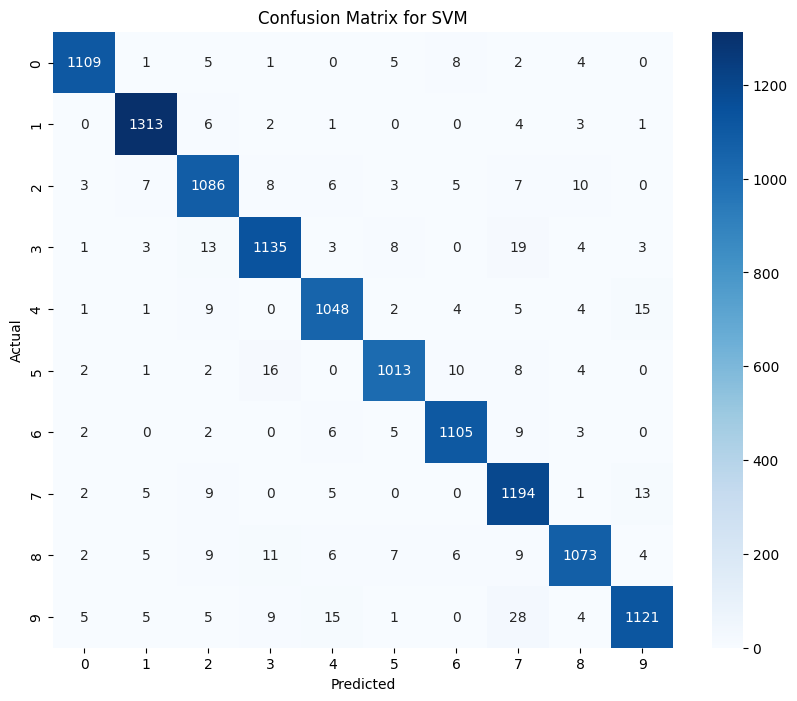

In [36]:
# Step 7: Visualizing results (Confusion Matrix for SVM)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_best_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Analiz of Confusion matrix

Confusion matrix shows number of right answers on diagonal and number of wrong answers for each of posible wrong answers.
It's easy to see that tuned SVM model give mostly right answers.

In [17]:

# Step 8: Potential Function Method (Placeholder)
# NOTE: Since there's no direct library for the "Potential Function Method," this part will depend on further clarification of the method.
# You could implement this using a kernel-based method (similar to RBF in SVM).

# Final Step: Export results for Kaggle
import pandas as pd
submission = pd.DataFrame({'ImageId': range(1, len(y_pred_best_svm) + 1), 'Label': y_pred_best_svm})
submission.to_csv('mnist_submission.csv', index=False)

## Conclusion

We tested three different machine learning methods on the MNIST dataset.


Based on the results obtained, the following conclusions can be drawn:

1.The K-Nearest Neighbors method gave very poor accuracy results (11.45%)

2.SVM method gives pretty good accuracy results (82.55%) and after tuning SVM method gives much better accuracy (96.36%).

So the most suteble method for task of hand writen numbers is SVM.
